In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X = np.array([0, 5, 10, 15, 20, 25])
Y = np.array([21, 39, 51, 63, 70, 90])

In [40]:
def least_squares_approximation(X, Y, degree):
# Створення матриці Вандермонда 
    # Кожен стовпець - степені вхідних точок X
    A = np.vander(X, degree + 1)
    
    # Розв'язання системи лінійних рівнянь методом найменших квадратів
    # Знаходження коефіцієнтів, що мінімізують похибку
    coefficients = np.linalg.lstsq(A, Y, rcond=None)[0]
    
    return coefficients

In [41]:
# Список ступенів поліноміальної апроксимації для порівняння
degrees = [1, 2, 3]

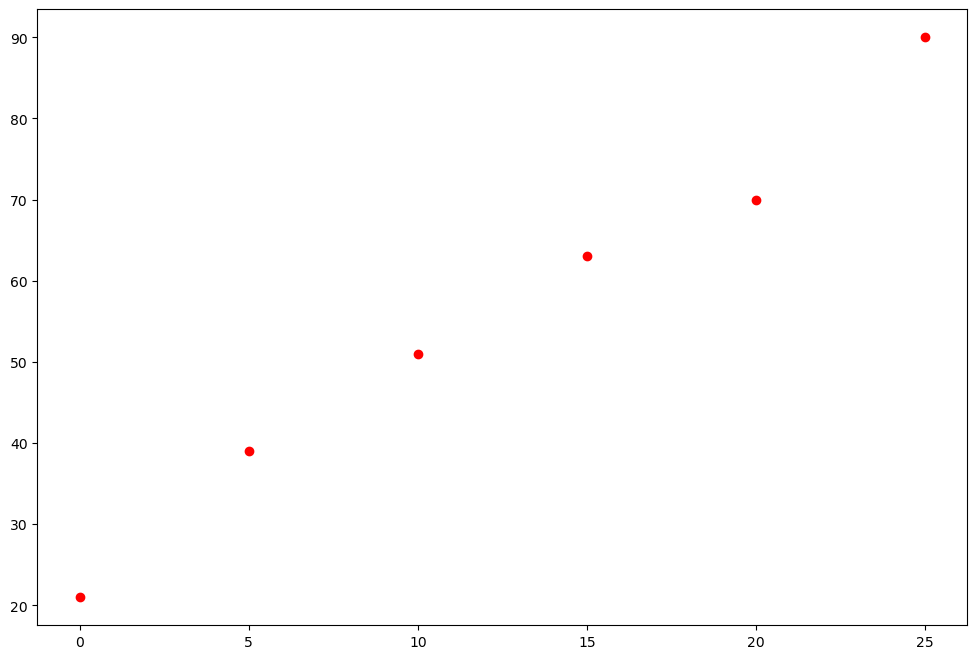

In [42]:
# Створення графіку
plt.figure(figsize=(12, 8))
# Нанесення експериментальних точок на графік
plt.scatter(X, Y, color='red', label='Експериментальні точки')

In [43]:
# Генерація додаткових точок для більш гладкої кривої
X_smooth = np.linspace(X.min(), X.max(), 100)

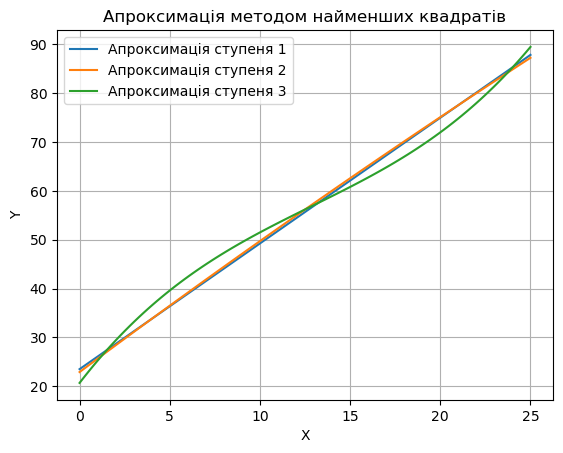

In [44]:
# Побудова апроксимуючих кривих різних ступенів
for degree in degrees:
    # Обчислення коефіцієнтів для поточного ступеня
    coeffs = least_squares_approximation(X, Y, degree)
    
    # Створення поліноміальної функції з обчислених коефіцієнтів
    poly_func = np.poly1d(coeffs)
    
    # Обчислення наближених значень Y для гладкої кривої
    Y_approx = poly_func(X_smooth)
    
    # Побудова апроксимуючої кривої на графіку
    plt.plot(X_smooth, Y_approx, label=f'Апроксимація ступеня {degree}')
    # Налаштування зовнішнього вигляду графіку
plt.title('Апроксимація методом найменших квадратів')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
print("Коефіцієнти апроксимації та середньоквадратичні похибки:")
for degree in degrees:
    coeffs = least_squares_approximation(X, Y, degree)
    Y_approx = np.polyval(coeffs, X)
    mse = np.mean((Y - Y_approx)**2)

    print(f"\nСтупінь {degree}:")
    print(f"Коефіцієнти: {coeffs}")
    print(f"Середньоквадратичні похибки: {mse:.4f}")

Коефіцієнти апроксимації та середньоквадратичні похибки:

Ступінь 1:
Коефіцієнти: [ 2.57142857 23.52380952]
Середньоквадратичні похибки: 7.7460

Ступінь 2:
Коефіцієнти: [-7.14285714e-03  2.75000000e+00  2.29285714e+01]
Середньоквадратичні похибки: 7.5476

Ступінь 3:
Коефіцієнти: [ 5.92592593e-03 -2.29365079e-01  4.77962963e+00  2.07063492e+01]
Середньоквадратичні похибки: 1.6217
